# Extract the following -
# 1. How many different types of calls.
# 2. Extract the date and time regarding the calls
# 3. At what time of day/month I can expect which type of call.
# 4. Visualize the percentage share of emergency type for each call.

# Import the necessary libraries

In [1]:
import pandas as pd

# Assign the dataset into data variable  

In [2]:
data = pd.read_csv('montcoalert.zip')

# Read the first five record

In [3]:
data.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


# Display the number of rows and columns

In [4]:
data.shape

(423909, 9)

# Display the first five record in title column

In [5]:
data.title.head()

0     EMS: BACK PAINS/INJURY
1    EMS: DIABETIC EMERGENCY
2        Fire: GAS-ODOR/LEAK
3     EMS: CARDIAC EMERGENCY
4             EMS: DIZZINESS
Name: title, dtype: object

# Define a function which separates its call_type

In [6]:
def call_separator(x):
    x = x.split(":")
    return x[0]

In [7]:
data['call_type']  = data['title'].apply(call_separator)

In [8]:
data.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,call_type
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS


# Count the number of unique call_types

In [9]:
data['call_type'].nunique()

3

# Count the total number of calls in each call_type

In [10]:
data['call_type'].value_counts()

EMS        208676
Traffic    151458
Fire        63775
Name: call_type, dtype: int64

# Show the first five record of timestamp column

In [11]:
data['timeStamp'].head()

0    2015-12-10 17:10:52
1    2015-12-10 17:29:21
2    2015-12-10 14:39:21
3    2015-12-10 16:47:36
4    2015-12-10 16:56:52
Name: timeStamp, dtype: object

# Convert the timestamp to date-time

In [12]:
data['timeStamp'] = pd.to_datetime(data['timeStamp'], infer_datetime_format = True)

In [13]:
data['timeStamp'].head()

0   2015-12-10 17:10:52
1   2015-12-10 17:29:21
2   2015-12-10 14:39:21
3   2015-12-10 16:47:36
4   2015-12-10 16:56:52
Name: timeStamp, dtype: datetime64[ns]

# Add the new column of year,month,day,hour,minute,second in the given dataset

In [14]:
import datetime as dt

In [15]:
data['Year'] = data['timeStamp'].dt.year
data['Month'] = data['timeStamp'].dt.month_name()
data['Day'] = data['timeStamp'].dt.day_name()
data['Hour'] = data['timeStamp'].dt.hour
data['Minute'] = data['timeStamp'].dt.minute
data['Second'] = data['timeStamp'].dt.second

In [16]:
data.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,call_type,Year,Month,Day,Hour,Minute,Second
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,2015,December,Thursday,17,10,52
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,2015,December,Thursday,17,29,21
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,2015,December,Thursday,14,39,21
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,2015,December,Thursday,16,47,36
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,2015,December,Thursday,16,56,52


# Write a function which displays the emergency type of each call_type

In [17]:
def emergency_separator(x):
    x = x.split(":")
    return x[1]

In [18]:
data['Emergency_type'] = data['title'].apply(emergency_separator)

In [19]:
data.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,call_type,Year,Month,Day,Hour,Minute,Second,Emergency_type
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,2015,December,Thursday,17,10,52,BACK PAINS/INJURY
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,2015,December,Thursday,17,29,21,DIABETIC EMERGENCY
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,2015,December,Thursday,14,39,21,GAS-ODOR/LEAK
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,2015,December,Thursday,16,47,36,CARDIAC EMERGENCY
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,2015,December,Thursday,16,56,52,DIZZINESS


# Count the total number of calls made in each call_type

In [20]:
total_calls = data['call_type'].value_counts()

In [21]:
total_calls

EMS        208676
Traffic    151458
Fire        63775
Name: call_type, dtype: int64

# Import the necessary libraries for plotting a graph

In [22]:
import matplotlib.pyplot as plt

In [23]:
import seaborn as sns

# Plot the bar chart that shows the total_calls for each call_type

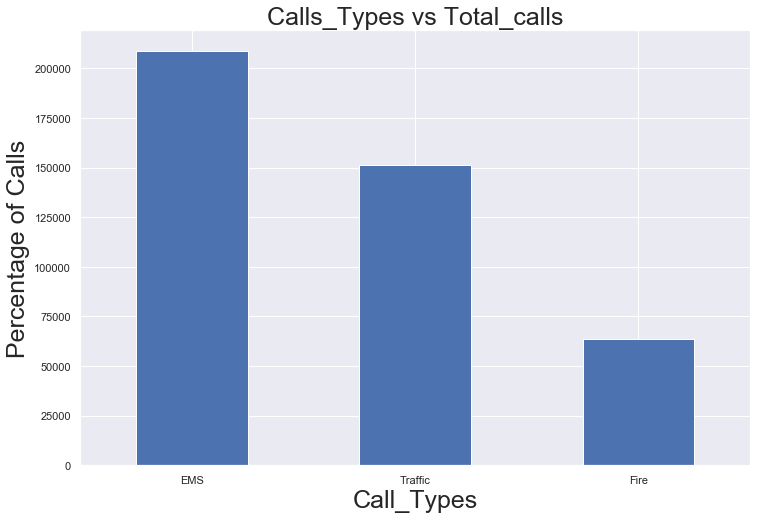

In [24]:
font = {
    'size' : 25
}
sns.set(rc={'figure.figsize':(12, 8)})
total_calls.plot(kind='bar')
plt.xlabel('Call_Types', fontdict=font)
plt.ylabel('Percentage of Calls', fontdict=font)
plt.xticks(rotation=0)
plt.title('Calls_Types vs Total_calls', fontdict=font)
plt.savefig('calls_type.png')

# Plot a pie chart that shows the total_calls in percentage

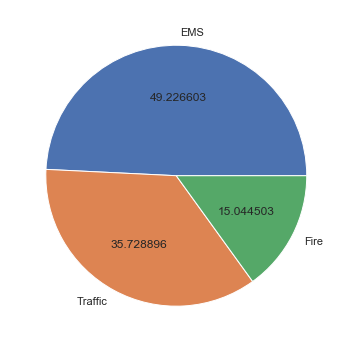

In [25]:
plt.figure(figsize = (12,6))
plt.pie(total_calls, labels = total_calls.index, autopct  ="%1f")
plt.savefig('pie.png')

# Group the month column to call_type and count the total number of calls

In [26]:
calls_data = data.groupby(['Month', 'call_type'])['call_type'].count()

In [27]:
calls_data.head()

Month   call_type
April   EMS          17255
        Fire          4983
        Traffic      11345
August  EMS          17965
        Fire          5717
Name: call_type, dtype: int64

# Count the percentage

In [28]:
calls_data_percentage = calls_data.groupby(level=0).apply(lambda x: round(100*x/float(x.sum())))

In [29]:
calls_data_percentage.head()

Month   call_type
April   EMS          51.0
        Fire         15.0
        Traffic      34.0
August  EMS          50.0
        Fire         16.0
Name: call_type, dtype: float64

# Make a series of months,assign them into a variable and make it as a index

In [30]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
calls_data_percentage = calls_data_percentage.reindex(month_order, level=0)
calls_data_percentage = calls_data_percentage.reindex(['EMS', 'Traffic', 'Fire'], level=1)


# Shows the first 20 records

In [31]:
calls_data_percentage.head(20)

Month     call_type
January   EMS          49.0
          Traffic      36.0
          Fire         15.0
February  EMS          51.0
          Traffic      35.0
          Fire         15.0
March     EMS          47.0
          Traffic      37.0
          Fire         15.0
April     EMS          51.0
          Traffic      34.0
          Fire         15.0
May       EMS          50.0
          Traffic      36.0
          Fire         14.0
June      EMS          49.0
          Traffic      36.0
          Fire         16.0
July      EMS          50.0
          Traffic      35.0
Name: call_type, dtype: float64

# Shows the last 20 records

In [32]:
calls_data_percentage.tail(20)

Month      call_type
June       Traffic      36.0
           Fire         16.0
July       EMS          50.0
           Traffic      35.0
           Fire         16.0
August     EMS          50.0
           Traffic      34.0
           Fire         16.0
September  EMS          50.0
           Traffic      35.0
           Fire         15.0
October    EMS          49.0
           Traffic      36.0
           Fire         15.0
November   EMS          46.0
           Traffic      40.0
           Fire         14.0
December   EMS          49.0
           Traffic      37.0
           Fire         14.0
Name: call_type, dtype: float64

# Plot a bar chart that shows number of calls per month

<Figure size 864x504 with 0 Axes>

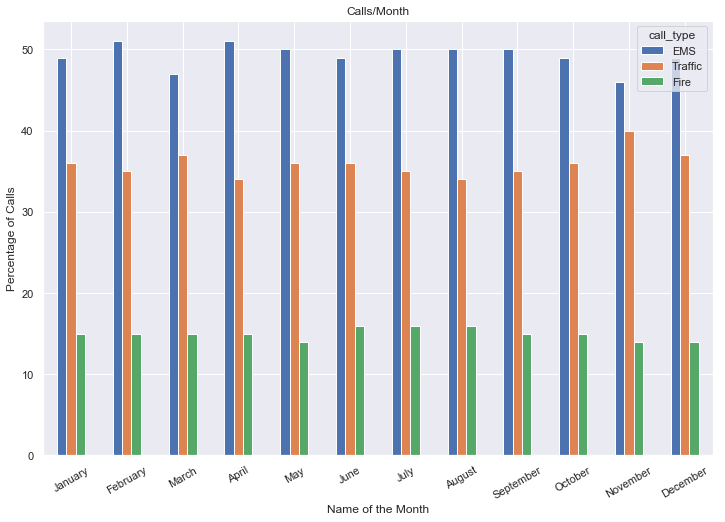

In [33]:
font = {
    'size' : 12
}
plt.figure(figsize = (12,7))
calls_data_percentage.unstack().plot(kind='bar')
plt.xlabel('Name of the Month', fontdict=font)
plt.ylabel('Percentage of Calls', fontdict=font)
plt.xticks(rotation=30)
plt.title('Calls/Month', fontdict=font)
plt.savefig('calls vs month.png')

# Group the hour column to call_type and count the total no of calls

In [34]:
hours_data = data.groupby(['Hour', 'call_type'])['call_type'].count()
hours_data.head()

Hour  call_type
0     EMS          5263
      Fire         1341
      Traffic      2046
1     EMS          4711
      Fire         1104
Name: call_type, dtype: int64

# Calculate the percentage of hours and show first 6 records

In [35]:
hours_data_percentage = hours_data.groupby(level=0).apply(lambda x: round(100*x/float(x.sum())))

hours_data_percentage.head(6)

Hour  call_type
0     EMS          61.0
      Fire         16.0
      Traffic      24.0
1     EMS          64.0
      Fire         15.0
      Traffic      21.0
Name: call_type, dtype: float64

# Plot a bar chart that shows number of calls made per hour

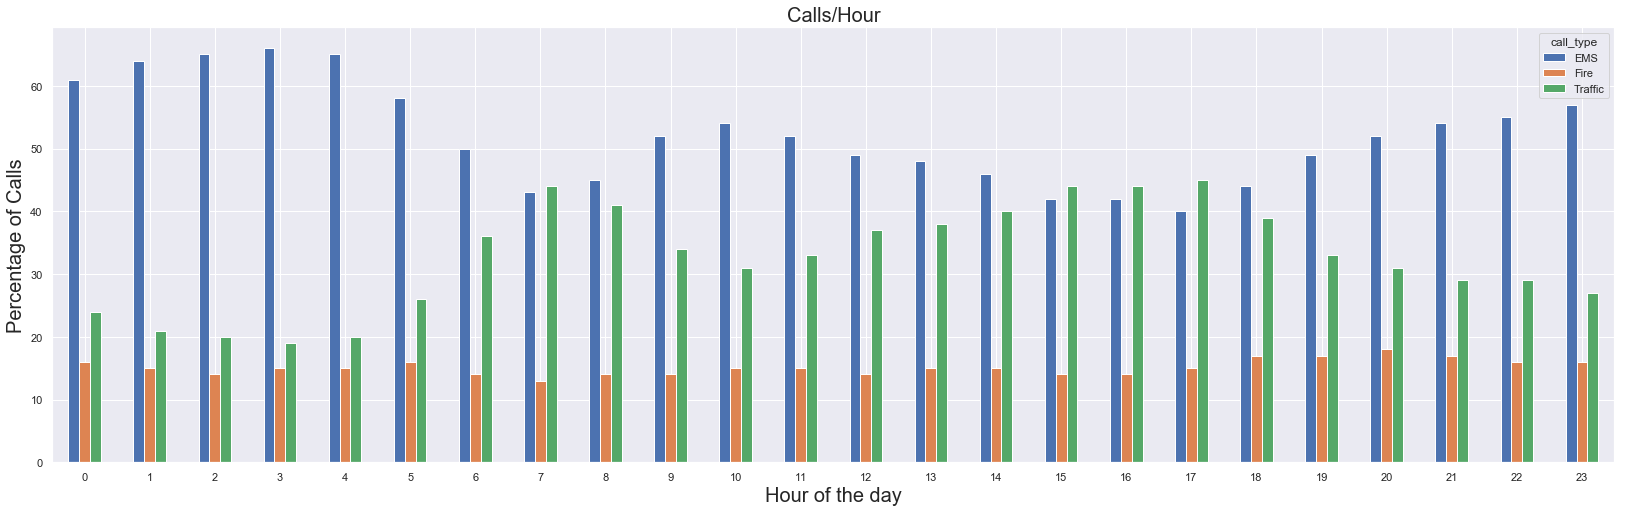

In [37]:
font = {
    'size' : 20
}
sns.set(rc={'figure.figsize':(28, 8)})
hours_data_percentage.unstack().plot(kind='bar')
plt.xlabel('Hour of the day', fontdict=font)
plt.ylabel('Percentage of Calls', fontdict=font)
plt.xticks(rotation=0)
plt.title('Calls/Hour', fontdict=font)
plt.savefig('calls vs hour.png')